# Project Overview

This is the third problem for the Big League Advance coding assessment. The dataset is a box score of ACC basketball outcomes from 2018-2019. The goal is to find a variable that has predictive capability of ranking the teams that play in the ACC.

# Importing Basic Libraries

In [1]:
#These are the libraries I typically use in my analysis so I find it easier to import them all at once
#If I need more libraries I will import them as needed

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

# Initial Review of the Data

In [2]:
#Reading in of the dataset

accbball = pd.read_csv("ACCGames2018_2019.csv")

In [3]:
#The beginning structure of this dataset contains 298 rows and 21 columns worth of data

accbball.shape

(298, 21)

In [4]:
#Most of the data is coded an an integer
#We may need to do some conversion though

accbball.dtypes

GameID      int64
Team       object
Home        int64
Score       int64
Result     object
AST         int64
TOV         int64
STL         int64
BLK         int64
Reb         int64
ORB         int64
DRB         int64
Opp_ORB     int64
Opp_DRB     int64
FGA         int64
FGM         int64
3FGM        int64
3FGA        int64
FTA         int64
FTM         int64
Fouls       int64
dtype: object

In [5]:
#A brief look at the beginning of the dataset

accbball.head()

,GameID,Team,Home,Score,Result,AST,TOV,STL,BLK,Reb,...,DRB,Opp_ORB,Opp_DRB,FGA,FGM,3FGM,3FGA,FTA,FTM,Fouls
0,1,Virginia Tech Hokies,1,81,Win,19,7,5,1,24,...,22,13,17,55,33,11,18,5,4,13
1,1,Notre Dame Fighting Irish,0,66,Loss,13,11,2,5,30,...,17,2,22,56,23,13,34,13,7,10
2,2,North Carolina State Wolfpack,0,87,Win,17,16,4,3,50,...,33,9,18,68,31,11,30,18,14,23
3,2,Miami (FL) Hurricanes,1,82,Loss,12,7,7,1,27,...,18,17,33,61,28,10,25,29,16,14
4,3,Duke Blue Devils,1,87,Win,16,12,13,6,39,...,27,9,26,67,32,7,23,21,16,15


In [6]:
#A brief look at the end of the dataset

accbball.tail()

,GameID,Team,Home,Score,Result,AST,TOV,STL,BLK,Reb,...,DRB,Opp_ORB,Opp_DRB,FGA,FGM,3FGM,3FGA,FTA,FTM,Fouls
293,147,Virginia Cavaliers,1,59,Loss,8,7,5,2,18,...,12,9,24,53,22,5,24,13,10,17
294,148,Duke Blue Devils,0,74,Win,15,12,6,6,34,...,25,15,23,65,31,5,20,13,7,16
295,148,North Carolina Tar Heels,1,73,Loss,13,8,5,0,38,...,23,9,25,73,29,4,26,15,11,15
296,149,Duke Blue Devils,1,73,Win,11,12,8,6,32,...,26,12,18,55,27,2,14,21,17,17
297,149,Florida State Seminoles,0,63,Loss,8,12,5,5,30,...,18,6,26,63,20,8,20,16,15,16


In [7]:
#Here I am looking at basic summary statistics for the numeric columns
#I don't see too much out of the ordinary

accbball.describe()

,GameID,Home,Score,AST,TOV,STL,BLK,Reb,ORB,DRB,Opp_ORB,Opp_DRB,FGA,FGM,3FGM,3FGA,FTA,FTM,Fouls
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,75.000000,0.500000,69.416107,12.979866,11.661074,6.033557,3.724832,32.929530,9.187919,23.741611,9.187919,23.741611,57.872483,24.456376,7.644295,23.090604,17.731544,12.778523,16.503356
std,43.083976,0.500841,12.067766,4.373889,3.633351,2.746080,2.460076,6.523596,3.584232,5.103344,3.584232,5.103344,7.527537,5.045227,3.114155,5.615201,7.037304,5.608850,3.980803
min,1.000000,0.000000,24.000000,2.000000,2.000000,0.000000,0.000000,18.000000,1.000000,12.000000,1.000000,12.000000,38.000000,9.000000,0.000000,5.000000,5.000000,2.000000,6.000000
25%,38.000000,0.000000,61.250000,10.000000,9.000000,4.000000,2.000000,28.000000,6.000000,20.000000,6.000000,20.000000,53.000000,21.000000,6.000000,19.000000,13.000000,9.000000,14.000000
50%,75.000000,0.500000,69.000000,13.000000,11.500000,6.000000,3.000000,32.000000,9.000000,23.000000,9.000000,23.000000,57.000000,24.000000,7.000000,23.000000,17.000000,12.000000,16.000000
75%,112.000000,1.000000,78.000000,16.000000,14.000000,8.000000,5.000000,37.000000,11.000000,27.000000,11.000000,27.000000,63.000000,27.000000,10.000000,27.000000,22.000000,16.000000,19.000000
max,149.000000,1.000000,113.000000,26.000000,23.000000,15.000000,13.000000,53.000000,18.000000,38.000000,18.000000,38.000000,80.000000,38.000000,18.000000,43.000000,46.000000,38.000000,31.000000


# Data Cleaning Round One

In [8]:
#There aren't any null values in this dataset

accbball.isna().sum() 

GameID     0
Team       0
Home       0
Score      0
Result     0
AST        0
TOV        0
STL        0
BLK        0
Reb        0
ORB        0
DRB        0
Opp_ORB    0
Opp_DRB    0
FGA        0
FGM        0
3FGM       0
3FGA       0
FTA        0
FTM        0
Fouls      0
dtype: int64

In [9]:
#There are two unique values for "Home", 2 for "Result", and 149 for "GameID"
#That tells me that Home is home or away, Result is win or lose, and that there are 149 total games (since there's 298 rows)

accbball.nunique()

GameID     149
Team        15
Home         2
Score       57
Result       2
AST         25
TOV         22
STL         16
BLK         14
Reb         34
ORB         18
DRB         27
Opp_ORB     18
Opp_DRB     27
FGA         38
FGM         28
3FGM        17
3FGA        32
FTA         34
FTM         28
Fouls       23
dtype: int64

In [10]:
#Here I am officially converting the categorical variables in 'Result' into dummy variables

#Wins = 1 And Losses = 0

accbball = pd.get_dummies(accbball, columns=['Result'], drop_first=True)

In [11]:
#Here I am officially converting the categorical variables in 'Home' into dummy variables

#Home = 1 And Away = 0

accbball = pd.get_dummies(accbball, columns=['Home'], drop_first=True)

In [12]:
#A look at the dataset after adding some dummy variables

accbball.head()

,GameID,Team,Score,AST,TOV,STL,BLK,Reb,ORB,DRB,...,Opp_DRB,FGA,FGM,3FGM,3FGA,FTA,FTM,Fouls,Result_Win,Home_1
0,1,Virginia Tech Hokies,81,19,7,5,1,24,2,22,...,17,55,33,11,18,5,4,13,1,1
1,1,Notre Dame Fighting Irish,66,13,11,2,5,30,13,17,...,22,56,23,13,34,13,7,10,0,0
2,2,North Carolina State Wolfpack,87,17,16,4,3,50,17,33,...,18,68,31,11,30,18,14,23,1,0
3,2,Miami (FL) Hurricanes,82,12,7,7,1,27,9,18,...,33,61,28,10,25,29,16,14,0,1
4,3,Duke Blue Devils,87,16,12,13,6,39,12,27,...,26,67,32,7,23,21,16,15,1,1


In [13]:
#I am droping GameID since I have finalized the wins and losses from each game
#I do not need to know which game they were a part of anymore

accbball = accbball.drop(['GameID'], axis = 'columns')

# Creating New Statistics

Basic stats like assists and rebounds are important. I don't want to dimiss them entirely. However, this is the age of advanced analytics. I am going to add some important ones to the dataset. I am then going to use logistic regression and see how these statistics can help predict wins and losses. The variable that has the greatest predictive power is the one I will hypothetically use to rank the teams in this dataset.



1.) Effective Field Goal Percentage: ([FG + (.5*3P)]/FGA)


2.) True Shooting Percentage: PTS/[2(FGA + (.44*FTA))]
  
  
3.) Assist to Turnover Ratio: AST/TOV


4.) Turnover Percentage: TOV/(FGA + 0.44 * FTA + TOV)


5.) Offensive Rebound Percentage: ORB/(ORB + Opp DRB)


6.) Defensive Rebound Percentage:  DRB/(Opp ORB + DRB)


7.) Free Throw Rate: FTM/FGA

In [14]:
#Here I am creating a column for effective field goal percentage

accbball["EFG%"] = (accbball["FGM"] + .5*accbball["3FGM"])/accbball["FGA"]

In [15]:
#Checking to see if it worked

accbball["EFG%"]

0      0.700000
1      0.526786
2      0.536765
3      0.540984
4      0.529851
5      0.476190
6      0.518519
7      0.479167
8      0.439655
9      0.500000
10     0.500000
11     0.322581
12     0.463235
13     0.615385
14     0.409091
15     0.471154
16     0.572464
17     0.517857
18     0.369231
19     0.637097
20     0.479452
21     0.531250
22     0.526316
23     0.342105
24     0.479167
25     0.405660
26     0.598361
27     0.507353
28     0.468750
29     0.407407
         ...   
268    0.397260
269    0.486486
270    0.575472
271    0.535088
272    0.543860
273    0.575000
274    0.518182
275    0.406780
276    0.427419
277    0.464286
278    0.410714
279    0.601852
280    0.291045
281    0.462121
282    0.418182
283    0.547170
284    0.418367
285    0.625000
286    0.491228
287    0.474576
288    0.492424
289    0.515385
290    0.567308
291    0.601852
292    0.630435
293    0.462264
294    0.515385
295    0.424658
296    0.509091
297    0.380952
Name: EFG%, Length: 298,

In [16]:
#Here I am creating a column for true shooting percentage

accbball["TSP%"] = accbball["Score"]/(2*(accbball["FGA"] + .44*accbball["FTA"]))

In [17]:
#Checking to see if it worked

accbball["TSP%"]

0      0.708042
1      0.534673
2      0.572972
3      0.555857
4      0.570567
5      0.497950
6      0.592308
7      0.559322
8      0.473427
9      0.512821
10     0.521600
11     0.394322
12     0.508496
13     0.686977
14     0.465283
15     0.542390
16     0.595238
17     0.563272
18     0.420331
19     0.630070
20     0.509443
21     0.596501
22     0.543961
23     0.397797
24     0.524776
25     0.438161
26     0.589248
27     0.550435
28     0.487665
29     0.486809
         ...   
268    0.434891
269    0.495484
270    0.617188
271    0.554341
272    0.581049
273    0.562777
274    0.579039
275    0.487737
276    0.442613
277    0.491995
278    0.450450
279    0.621934
280    0.353711
281    0.516529
282    0.475500
283    0.586440
284    0.466667
285    0.658807
286    0.525550
287    0.486712
288    0.503452
289    0.558998
290    0.583658
291    0.633293
292    0.655894
293    0.502384
294    0.523190
295    0.458543
296    0.568182
297    0.449743
Name: TSP%, Length: 298,

In [18]:
#Here I am creating a column for assist to turnover ratio

accbball["Ratio"] = accbball["AST"]/accbball["TOV"]

In [19]:
#Checking to see if it worked

accbball["Ratio"]

0      2.714286
1      1.181818
2      1.062500
3      1.714286
4      1.333333
5      0.875000
6      1.181818
7      0.833333
8      1.600000
9      1.222222
10     2.181818
11     0.466667
12     0.769231
13     1.666667
14     0.615385
15     1.200000
16     2.714286
17     0.583333
18     0.400000
19     1.411765
20     1.307692
21     0.869565
22     0.666667
23     1.500000
24     0.800000
25     0.875000
26     1.250000
27     0.944444
28     1.666667
29     0.833333
         ...   
268    1.250000
269    1.600000
270    1.090909
271    0.714286
272    2.285714
273    2.666667
274    0.800000
275    1.500000
276    1.181818
277    1.250000
278    1.250000
279    1.888889
280    2.000000
281    2.800000
282    0.642857
283    1.076923
284    0.666667
285    2.571429
286    1.076923
287    1.222222
288    1.636364
289    1.777778
290    0.411765
291    0.888889
292    0.833333
293    1.142857
294    1.250000
295    1.625000
296    0.916667
297    0.666667
Name: Ratio, Length: 298

In [20]:
#Here I am creating a column for turnover percentage

accbball["TOV%"] = accbball["TOV"]/((accbball["FGA"] + .44*accbball["FTA"] + accbball["TOV"]))

In [21]:
#Checking to see if it worked

accbball["TOV%"]

0      0.109034
1      0.151265
2      0.174064
3      0.086677
4      0.135993
5      0.189843
6      0.144737
7      0.169014
8      0.132485
9      0.113636
10     0.118945
11     0.164690
12     0.143361
13     0.151976
14     0.188734
15     0.143021
16     0.084746
17     0.156250
18     0.162478
19     0.197583
20     0.139067
21     0.233645
22     0.285533
23     0.109051
24     0.205142
25     0.209205
26     0.137112
27     0.187266
28     0.114329
29     0.158562
         ...   
268    0.129758
269    0.111458
270    0.146667
271    0.179395
272    0.094441
273    0.086856
274    0.126454
275    0.100301
276    0.143753
277    0.117716
278    0.114025
279    0.136199
280    0.038501
281    0.064433
282    0.184114
283    0.172780
284    0.130435
285    0.108225
286    0.173704
287    0.122084
288    0.136612
289    0.108121
290    0.216065
291    0.213472
292    0.185759
293    0.106512
294    0.145068
295    0.091324
296    0.157398
297    0.146270
Name: TOV%, Length: 298,

In [22]:
#Here I am creating a column for offensive rebound percentage

accbball["ORB%"] = accbball["ORB"]/(accbball["ORB"] + accbball["Opp_DRB"])

In [23]:
#Checking to see if it worked

accbball["ORB%"]

0      0.105263
1      0.371429
2      0.485714
3      0.214286
4      0.315789
5      0.250000
6      0.285714
7      0.178571
8      0.230769
9      0.333333
10     0.380952
11     0.250000
12     0.333333
13     0.227273
14     0.187500
15     0.206897
16     0.368421
17     0.294118
18     0.357143
19     0.428571
20     0.186047
21     0.375000
22     0.086957
23     0.250000
24     0.178571
25     0.257143
26     0.187500
27     0.333333
28     0.343750
29     0.228571
         ...   
268    0.326087
269    0.300000
270    0.266667
271    0.281250
272    0.354839
273    0.258065
274    0.379310
275    0.365854
276    0.361111
277    0.142857
278    0.250000
279    0.259259
280    0.276596
281    0.394737
282    0.416667
283    0.400000
284    0.225806
285    0.227273
286    0.266667
287    0.166667
288    0.142857
289    0.200000
290    0.264706
291    0.357143
292    0.428571
293    0.200000
294    0.281250
295    0.375000
296    0.250000
297    0.315789
Name: ORB%, Length: 298,

In [24]:
#Here I am creating a column for defensive rebound percentage

accbball["DRB%"] = accbball["DRB"]/(accbball["DRB"] + accbball["Opp_ORB"])

In [25]:
#Checking to see if it worked

accbball["DRB%"]

0      0.628571
1      0.894737
2      0.785714
3      0.514286
4      0.750000
5      0.684211
6      0.821429
7      0.714286
8      0.666667
9      0.769231
10     0.750000
11     0.619048
12     0.772727
13     0.666667
14     0.793103
15     0.812500
16     0.705882
17     0.631579
18     0.571429
19     0.642857
20     0.625000
21     0.813953
22     0.750000
23     0.913043
24     0.742857
25     0.821429
26     0.666667
27     0.812500
28     0.771429
29     0.656250
         ...   
268    0.700000
269    0.673913
270    0.718750
271    0.733333
272    0.741935
273    0.645161
274    0.634146
275    0.620690
276    0.857143
277    0.638889
278    0.740741
279    0.750000
280    0.605263
281    0.723404
282    0.600000
283    0.583333
284    0.772727
285    0.774194
286    0.833333
287    0.733333
288    0.800000
289    0.857143
290    0.642857
291    0.735294
292    0.800000
293    0.571429
294    0.625000
295    0.718750
296    0.684211
297    0.750000
Name: DRB%, Length: 298,

In [26]:
#Here I am creating a column for free throw rate
    
accbball["FTR"] = accbball["FTM"]/accbball["FGA"]

In [27]:
#Checking to see if it worked

accbball["FTR"]

0      0.072727
1      0.125000
2      0.205882
3      0.262295
4      0.238806
5      0.126984
6      0.388889
7      0.416667
8      0.189655
9      0.058824
10     0.148649
11     0.322581
12     0.235294
13     0.538462
14     0.363636
15     0.307692
16     0.159420
17     0.267857
18     0.261538
19     0.129032
20     0.164384
21     0.343750
22     0.236842
23     0.228070
24     0.312500
25     0.188679
26     0.262295
27     0.250000
28     0.125000
29     0.333333
         ...   
268    0.164384
269    0.094595
270    0.339623
271    0.175439
272    0.280702
273    0.033333
274    0.418182
275    0.372881
276    0.080645
277    0.125000
278    0.178571
279    0.111111
280    0.208955
281    0.212121
282    0.236364
283    0.283019
284    0.306122
285    0.333333
286    0.157895
287    0.118644
288    0.075758
289    0.246154
290    0.250000
291    0.351852
292    0.239130
293    0.188679
294    0.107692
295    0.150685
296    0.309091
297    0.238095
Name: FTR, Length: 298, 

In [28]:
#Here is the dataset after the addition of the advanced metrics

accbball.head()

,Team,Score,AST,TOV,STL,BLK,Reb,ORB,DRB,Opp_ORB,...,Fouls,Result_Win,Home_1,EFG%,TSP%,Ratio,TOV%,ORB%,DRB%,FTR
0,Virginia Tech Hokies,81,19,7,5,1,24,2,22,13,...,13,1,1,0.700000,0.708042,2.714286,0.109034,0.105263,0.628571,0.072727
1,Notre Dame Fighting Irish,66,13,11,2,5,30,13,17,2,...,10,0,0,0.526786,0.534673,1.181818,0.151265,0.371429,0.894737,0.125000
2,North Carolina State Wolfpack,87,17,16,4,3,50,17,33,9,...,23,1,0,0.536765,0.572972,1.062500,0.174064,0.485714,0.785714,0.205882
3,Miami (FL) Hurricanes,82,12,7,7,1,27,9,18,17,...,14,0,1,0.540984,0.555857,1.714286,0.086677,0.214286,0.514286,0.262295
4,Duke Blue Devils,87,16,12,13,6,39,12,27,9,...,15,1,1,0.529851,0.570567,1.333333,0.135993,0.315789,0.750000,0.238806


#### Dropping Irrelevant Columns

The goal of this exercise is to find stats that teams and others can use to actually improve play and make adjustments. Not every column of data is useful for predicting wins and losses. For example "Score". Of course the team that scores the most points wins. That's literally how the outcome is determined. But that doesn't tell us anything. We need to know what led to that score. Also, scoring a lot of points isn't always useful. You just need to score more than the opponent. To be extreme, a 2-1 victory. may be embarrassing, but it's still a win.

In [29]:
#I am dropping "Score" for reasons laid out above
#I am dropping FGM and FGA because both aren't useful for actually predicting wins and losses. 
#The team that makes more field goals than the other probably wins since that tallies up to more points.
#But you can't just say "make more shots." A better way would be to see where you're shooting, or how well you are shooting.

accbball = accbball.drop(['Score', 'FGA', 'FGM'], axis = 'columns')

# First Pass Model

Here I am going to set up my logistic regression model and measure the accuracy using a confusion matrix at the end.

In [30]:
#I am dropping "Team" since I am not using them as a predictive variable

model_1 = accbball.drop(['Team'], axis = 'columns')

In [31]:
#Separating X and y values

X = model_1.drop('Result_Win', axis='columns')
y = model_1.loc[:, 'Result_Win']

In [32]:
#Here I am importing train-test split so I can create a training set to train the model and a test set to test it

from sklearn.model_selection import train_test_split


#Here we are splitting the dataset into a training set and test set for our model
#As you can see, "test size" of .2 means 20% of the data will be used for the test set and 80% for the training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [33]:
#My independent variables are expressed in different terms. It's important to implement feature scaling to account for that

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)

#No need to add "fit" to the test set since it's already fitted
X_test = sc_X.transform(X_test)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [34]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

#Here I am fitting the model on the training set
classifier.fit(X_train, y_train)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
#Here I am creating the predicted values from the test set in order to evalute the model later using a confusion matrix

y_pred = classifier.predict(X_test)

In [36]:
#The results of this round went pretty well. It captured 87% of the variance in the training set and 93% in the test set.

print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

0.8697478991596639
0.9333333333333333


In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred) 

print(cm)

[[28  3]
 [ 1 28]]


In [38]:
#Accuracy of the model = 93%

(28+28)/60

0.9333333333333333

# Checking for Collinearity

Many of the statistics in this dataset are related to each other. For example a steal is a turnover. A regular rebound can be offensive or defensive. Collinearity among these stats would not be surprising.

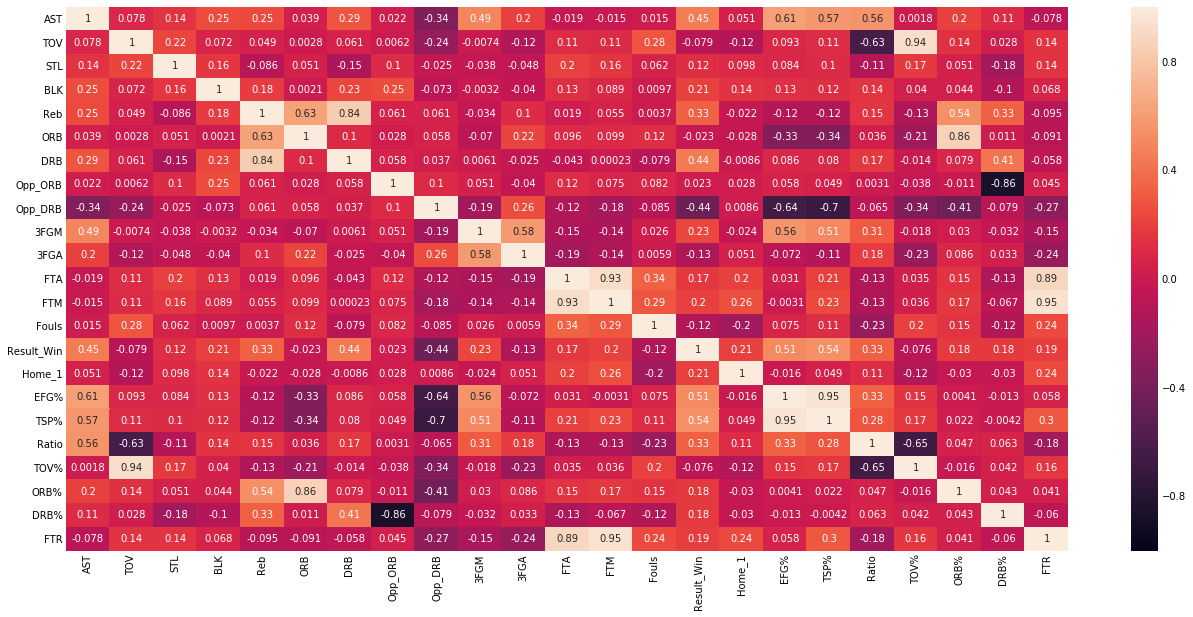

In [39]:
#There is almost perfect correlation between FTR and FTM, TSP% and EFG%, FTA and FTM, TOV and TOV%
#Some of these I will drop and others I will double check with significance


fig, ax = plt.subplots(figsize=(20,10)) 

ax = sns.heatmap(model_1.corr(), vmin = -1, vmax = 1, annot=True)

In [40]:
#This is a little more helpful for seeing the big picture when it comes to correlation
#ORB and Opp_ORB (same with DRB) have equal magnitudes with opposite signs
#I am going to drop them from the dataset
#It is interesting that 3FGM has positive correlation, whereas 3FGA has negative correlation
#That tells me you shouldn't shoot three pointers just for the sake of three pointers
#I think it will be better to create a column highlighting three point percentage instead

model_1.corr().loc[:, 'Result_Win'].sort_values(ascending=False)

Result_Win    1.000000
TSP%          0.540698
EFG%          0.510682
AST           0.445732
DRB           0.438006
Ratio         0.331979
Reb           0.330282
3FGM          0.233146
Home_1        0.208054
BLK           0.207687
FTM           0.200164
FTR           0.192664
ORB%          0.178401
DRB%          0.178401
FTA           0.170998
STL           0.122405
Opp_ORB       0.022508
ORB          -0.022508
TOV%         -0.075503
TOV          -0.078637
Fouls        -0.124970
3FGA         -0.132294
Opp_DRB      -0.438006
Name: Result_Win, dtype: float64

In [41]:
#Here I am creating a column for three point percentage
    
accbball["3PT%"] = accbball["3FGM"]/accbball["3FGA"]

In [42]:
#Checking to see if it came out correct

accbball["3PT%"]

0      0.611111
1      0.382353
2      0.366667
3      0.400000
4      0.304348
5      0.400000
6      0.272727
7      0.296296
8      0.333333
9      0.413793
10     0.416667
11     0.105263
12     0.409091
13     0.300000
14     0.260870
15     0.437500
16     0.419355
17     0.384615
18     0.222222
19     0.304348
20     0.285714
21     0.400000
22     0.375000
23     0.185185
24     0.230769
25     0.250000
26     0.450000
27     0.250000
28     0.230769
29     0.222222
         ...   
268    0.250000
269    0.387097
270    0.437500
271    0.437500
272    0.571429
273    0.350000
274    0.357143
275    0.240000
276    0.391304
277    0.285714
278    0.275862
279    0.407407
280    0.111111
281    0.310345
282    0.434783
283    0.444444
284    0.150000
285    0.476190
286    0.387097
287    0.210526
288    0.305556
289    0.350000
290    0.428571
291    0.304348
292    0.375000
293    0.208333
294    0.250000
295    0.153846
296    0.142857
297    0.400000
Name: 3PT%, Length: 298,

In [43]:
#Dropping the columns I no longer need
#I am dropping ORB and DRB because I think ORB% and DRB% better capture the importance of rebounding
#Your offensive rebounding can negate the opponents rebounding. Are you getting second chance points?

accbball = accbball.drop(['Opp_ORB', 'Opp_DRB', '3FGM', '3FGA', 
                          'FTA', 'FTM', 'TOV', 'DRB', 'ORB'], axis = 'columns')

In [44]:
#Here is the dataset after further cleaning

accbball.head()

,Team,AST,STL,BLK,Reb,Fouls,Result_Win,Home_1,EFG%,TSP%,Ratio,TOV%,ORB%,DRB%,FTR,3PT%
0,Virginia Tech Hokies,19,5,1,24,13,1,1,0.700000,0.708042,2.714286,0.109034,0.105263,0.628571,0.072727,0.611111
1,Notre Dame Fighting Irish,13,2,5,30,10,0,0,0.526786,0.534673,1.181818,0.151265,0.371429,0.894737,0.125000,0.382353
2,North Carolina State Wolfpack,17,4,3,50,23,1,0,0.536765,0.572972,1.062500,0.174064,0.485714,0.785714,0.205882,0.366667
3,Miami (FL) Hurricanes,12,7,1,27,14,0,1,0.540984,0.555857,1.714286,0.086677,0.214286,0.514286,0.262295,0.400000
4,Duke Blue Devils,16,13,6,39,15,1,1,0.529851,0.570567,1.333333,0.135993,0.315789,0.750000,0.238806,0.304348


# Second Pass Model

In [45]:
#I am dropping "Team" since I am not using them as a predictive variable

model_1 = accbball.drop(['Team'], axis = 'columns')

In [46]:
#Separating X and y values

X = model_1.drop('Result_Win', axis='columns')
y = model_1.loc[:, 'Result_Win']

In [47]:
#Here I am importing train-test split so I can create a training set to train the model and a test set to test it

from sklearn.model_selection import train_test_split


#Here we are splitting the dataset into a training set and test set for our model
#As you can see, "test size" of .2 means 20% of the data will be used for the test set and 80% for the training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [48]:
#My independent variables are expressed in different terms. It's important to implement feature scaling to account for that

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)

#No need to add "fit" to the test set since it's already fitted
X_test = sc_X.transform(X_test)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [49]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

#Here I am fitting the model on the training set
classifier.fit(X_train, y_train)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
#Here I am creating the predicted values from the test set in order to evalute the model later using a confusion matrix

y_pred = classifier.predict(X_test)

In [51]:
#The results of this round went pretty well. It captured 87% of the variance in the training set and 92% in the test set.
#We only lost a little bit of accuracy after eliminating variables so that's good. We got rid of unwanted noise

print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

0.865546218487395
0.9166666666666666


In [52]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred) 

print(cm)

[[28  3]
 [ 2 27]]


In [53]:
#Accuracy of the model = 92%

(28+27)/60

0.9166666666666666

# Backwards Elimination for Feature Selection

I believe it's important to narrow down the truly important variables when explaining outcomes. You could hypothetically keep adding variables and improve accuracy due to how R-Squared is calculated. We don't want that. We only want variables that we can truly focus on for future evaluation. Backwards elimination is my preferred method of determining the best explanatory variables.

In [54]:
#Here I am importing the stats model package that allows for OLS investigation

import statsmodels.api as sm

In [55]:
#Essentially we need a B0X0
#The stats model library is useful, but does not contain the constant column, hence why we add it

#This is specifically a column of 298 "ones" since the constant will just multiply by one to keep its value
#The append function helps us add a new column to our dataset

X = np.append(arr =  np.ones((298,1)).astype(int), values = X, axis = 1)

In [56]:
#The stats model has an OLS method that gives us a nice statistical summary of our model

regressor_OLS = sm.OLS(endog = y, exog = X).fit()

In [57]:
#Here is the OLS summary
#Lots of these variables are not statistically significant at the 5% level

regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Result_Win   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     24.59
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           4.49e-41
Time:                        14:34:39   Log-Likelihood:                -97.696
No. Observations:                 298   AIC:                             225.4
Df Residuals:                     283   BIC:                             280.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2766      0.290     -7.863      0.000      -2.846      -1.707
x1            -0.0048      0.008     -0.581      0.562      -0.021       0.011
x2             0.0222      0.008      2.789      0.006       0.007       0.038
x3             0.0082      0.009      0.910      0.364      -0.010       0.026
x4             0.0312      0.004      7.184      0.000       0.023       0.040
x5            -0.0204      0.006     -3.586      0.000      -0.032      -0.009
x6             0.1165      0.044      2.652      0.008       0.030       0.203
x7             1.8397      1.207      1.524      0.129      -0.537       4.216
x8             1.1249      1.387      0.811      0.418      -1.606       3.856
x9             0.0108      0.065      0.165      0.869      -0.118       0.140
x10           -1.3210      0.790     -1.671      0.096      -2.877       0.235
x11           -0.1654      0.282     -0.587      0.557      -0.720       0.389
x12            0.4798      0.260      1.846      0.066      -0.032       0.991
x13            0.7938      0.340      2.334      0.020       0.124       1.463
x14            0.3908      0.261      1.499      0.135      -0.122       0.904
==============================================================================
Omnibus:                        0.731   Durbin-Watson:                   2.637
Prob(Omnibus):                  0.694   Jarque-Bera (JB):                0.846
Skew:                           0.075   Prob(JB):                        0.655
Kurtosis:                       2.787   Cond. No.                     3.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
#The constant, B0

X[:, 0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [59]:
#X1 = AST

X[:, 1]

array([19., 13., 17., 12., 16., 14., 13., 10., 16., 11., 24.,  7., 10.,
       20.,  8., 12., 19.,  7.,  6., 24., 17., 20., 12., 12., 12., 14.,
       15., 17., 15., 10., 17.,  6., 11.,  9., 11.,  5., 13., 16., 13.,
       17., 14., 16., 16., 11., 16., 13., 13., 21.,  8.,  8., 10., 10.,
       10., 18., 13., 15., 16., 14.,  7., 13.,  8.,  6., 13., 26., 15.,
       15., 17.,  8.,  8., 15., 21., 13., 12., 16., 25., 21., 14., 13.,
       15., 11., 14., 10.,  6., 15., 14., 13., 11., 22., 11., 14., 12.,
       10.,  8., 14.,  5., 11., 12., 17., 23.,  7., 11., 20.,  9., 13.,
       15., 10., 15., 21., 17.,  2., 13., 14., 11., 13., 16.,  3., 16.,
       14.,  8.,  2.,  5., 10., 10., 17.,  6., 16., 14., 11.,  8., 13.,
       13., 14.,  9., 14., 15., 16., 26., 17.,  7., 25.,  8., 17.,  8.,
        7., 14., 15., 13.,  7., 17., 11., 12., 10., 12.,  6., 15., 18.,
       13., 12., 17., 16., 14., 13., 17., 10.,  8.,  9., 21., 13., 19.,
        8., 15., 20., 16., 21.,  8., 21.,  8.,  8., 12.,  8., 17

In [60]:
#X2 = STL

X[:, 2]

array([ 5.,  2.,  4.,  7., 13.,  6.,  5.,  4.,  3.,  4.,  8.,  7.,  6.,
       11.,  9.,  4.,  1.,  4.,  5.,  7., 12.,  4.,  5.,  3.,  5.,  7.,
        6.,  2.,  7.,  3.,  5.,  4.,  7.,  4.,  4.,  7.,  8.,  9.,  9.,
        8.,  7.,  8.,  5.,  7., 15., 10.,  3.,  8.,  7.,  7.,  8.,  8.,
        6.,  4.,  2.,  6.,  6.,  6.,  6.,  5.,  4.,  5.,  7.,  7.,  4.,
        4.,  8.,  4.,  3.,  8.,  5.,  6.,  4.,  6.,  9.,  8.,  1.,  1.,
        9.,  8.,  6.,  5.,  5.,  9.,  6.,  5.,  4.,  7., 10., 13.,  2.,
        1.,  4.,  8.,  8.,  3.,  2.,  6.,  4.,  8.,  5.,  5.,  7.,  8.,
        2.,  8.,  8., 10.,  4.,  7., 11., 11.,  6.,  5.,  6.,  6.,  7.,
        4.,  8.,  5.,  3.,  5.,  3.,  4.,  6.,  5.,  6.,  7.,  4.,  8.,
        4.,  3.,  1.,  9.,  9.,  4.,  7.,  9.,  9., 11.,  6.,  7., 10.,
        6.,  6.,  9.,  6.,  7.,  7.,  6.,  4., 12.,  1., 11.,  8., 12.,
        7.,  8.,  2.,  5.,  5., 10.,  6., 12.,  5.,  3.,  7.,  3., 10.,
       10.,  2.,  7.,  8.,  9.,  2., 13.,  5.,  5.,  5.,  6.,  7

In [61]:
#X3 = BLK

X[:, 3]

array([ 1.,  5.,  3.,  1.,  6.,  2.,  2.,  2.,  7.,  3.,  7.,  7.,  2.,
        8.,  6.,  2.,  1.,  0.,  0., 13.,  8.,  5.,  4.,  2.,  7.,  2.,
        6.,  5.,  3.,  0.,  6.,  0.,  5.,  3.,  2.,  2.,  4.,  6.,  3.,
        0.,  3.,  7.,  5.,  0.,  4.,  4.,  5., 12.,  8.,  6.,  4.,  4.,
        1.,  2.,  8.,  2.,  2.,  3.,  7.,  2.,  4.,  1.,  2.,  1.,  4.,
        3., 10.,  2.,  0.,  4.,  2.,  6.,  4.,  4.,  2.,  1.,  1.,  1.,
        4.,  2.,  6.,  3.,  3.,  7.,  2.,  3.,  1., 11.,  3.,  7.,  5.,
        3.,  4.,  4.,  4.,  0.,  3.,  2.,  2.,  2.,  3.,  4.,  3.,  6.,
        6.,  4.,  7.,  2.,  7.,  1.,  3.,  1.,  1.,  0.,  3.,  2.,  3.,
        3.,  3.,  3.,  2.,  5.,  3.,  2.,  2.,  6.,  1.,  6.,  3., 10.,
        5.,  0.,  0.,  9.,  4.,  6.,  7.,  6.,  7.,  3.,  8.,  7.,  1.,
        1.,  3.,  4., 12.,  0.,  4.,  8.,  1.,  6.,  1.,  2.,  5.,  5.,
        7.,  2.,  3.,  6.,  7.,  2.,  3.,  2.,  2.,  4.,  6.,  3.,  4.,
        3.,  4.,  3.,  3.,  7.,  4.,  6.,  3.,  2.,  4.,  3.,  6

In [62]:
#X4 = Rebounds

X[:, 4]

array([24., 30., 50., 27., 39., 35., 31., 25., 35., 43., 49., 37., 28.,
       27., 29., 32., 38., 34., 31., 39., 28., 47., 29., 30., 31., 32.,
       28., 37., 38., 29., 38., 18., 40., 41., 46., 36., 30., 38., 26.,
       36., 27., 36., 36., 33., 28., 25., 44., 48., 38., 34., 39., 41.,
       19., 27., 36., 47., 41., 30., 18., 28., 27., 30., 23., 36., 37.,
       42., 30., 39., 30., 22., 41., 29., 36., 33., 32., 30., 28., 31.,
       34., 29., 39., 33., 30., 35., 36., 24., 32., 27., 32., 38., 44.,
       29., 33., 37., 33., 26., 38., 28., 29., 23., 23., 32., 32., 39.,
       36., 24., 32., 37., 29., 23., 26., 22., 23., 23., 39., 32., 47.,
       31., 37., 32., 30., 35., 25., 34., 23., 40., 37., 34., 35., 30.,
       24., 30., 30., 41., 32., 41., 38., 22., 27., 31., 24., 34., 38.,
       31., 35., 29., 28., 26., 34., 34., 30., 32., 33., 31., 25., 24.,
       33., 43., 37., 26., 42., 37., 38., 39., 34., 26., 41., 25., 37.,
       28., 26., 23., 23., 43., 32., 34., 28., 39., 35., 31., 48

In [63]:
#X5 = Fouls

X[:, 5]

array([13., 10., 23., 14., 15., 16., 18., 22., 12., 15., 24., 19., 23.,
       19., 19., 16., 16., 16., 16., 22., 21., 20., 22., 15., 16., 22.,
       26., 24., 20., 15., 16., 12., 15., 19., 13., 14., 21., 19., 21.,
       20., 15., 14., 12., 20., 17., 19., 20., 20., 31., 19., 22., 14.,
       10., 10., 16., 15., 11., 15., 17., 18., 20., 18., 15., 19., 18.,
       19., 14., 23., 18., 24., 22., 17., 25., 20., 13., 18., 15., 17.,
       12., 15., 15., 18., 17., 17., 23., 12.,  7.,  8., 17., 13.,  9.,
        8., 19., 15., 16., 21., 10., 13., 15., 17., 17., 17., 14., 15.,
       22., 16., 12., 13., 19., 21., 14., 12., 19., 19., 17., 16., 15.,
       16., 11., 16., 23., 19., 13., 13., 14., 10., 17., 17., 14., 12.,
       14., 16., 15., 13., 15., 17., 23., 28., 14., 21., 11., 15., 13.,
       10., 16., 13., 18., 12., 16., 20., 20., 16., 28., 21., 17.,  9.,
       17., 14., 14., 11., 16., 18., 17., 17., 17., 16., 16., 16., 17.,
       19., 14., 16., 19., 16.,  9., 19., 12., 17.,  6., 13., 17

In [64]:
#X6 = Home/Away

X[:, 6]

array([1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 0.

In [65]:
#X7 = EFG%

X[:, 7]

array([0.7       , 0.52678571, 0.53676471, 0.54098361, 0.52985075,
       0.47619048, 0.51851852, 0.47916667, 0.43965517, 0.5       ,
       0.5       , 0.32258065, 0.46323529, 0.61538462, 0.40909091,
       0.47115385, 0.57246377, 0.51785714, 0.36923077, 0.63709677,
       0.47945205, 0.53125   , 0.52631579, 0.34210526, 0.47916667,
       0.40566038, 0.59836066, 0.50735294, 0.46875   , 0.40740741,
       0.67272727, 0.44736842, 0.40163934, 0.44615385, 0.49122807,
       0.28703704, 0.50909091, 0.47183099, 0.37068966, 0.62037037,
       0.54615385, 0.46774194, 0.59375   , 0.39041096, 0.66666667,
       0.37719298, 0.50625   , 0.44375   , 0.36206897, 0.40217391,
       0.4109589 , 0.46153846, 0.51136364, 0.70754717, 0.49180328,
       0.46323529, 0.56451613, 0.50833333, 0.52272727, 0.5754717 ,
       0.55660377, 0.52941176, 0.57272727, 0.625     , 0.46610169,
       0.48550725, 0.57407407, 0.42307692, 0.45833333, 0.67647059,
       0.52272727, 0.39      , 0.47761194, 0.60909091, 0.65671

In [66]:
#X8 = TSP%

X[:, 8]

array([0.70804196, 0.53467272, 0.57297155, 0.55585683, 0.57056663,
       0.49794962, 0.59230769, 0.55932203, 0.473427  , 0.51282051,
       0.52160039, 0.39432177, 0.5084964 , 0.6869773 , 0.46528275,
       0.54238985, 0.5952381 , 0.5632716 , 0.42033109, 0.63006952,
       0.50944334, 0.59650053, 0.54396092, 0.39779682, 0.52477632,
       0.43816138, 0.58924788, 0.55043523, 0.48766495, 0.48680905,
       0.67854807, 0.45931759, 0.48509561, 0.47550432, 0.50578035,
       0.34970722, 0.59417706, 0.52439024, 0.44361763, 0.6341687 ,
       0.55865922, 0.53748622, 0.65381968, 0.4222973 , 0.67743133,
       0.44535024, 0.53757356, 0.49521114, 0.44361763, 0.56612319,
       0.43529106, 0.55192786, 0.57303807, 0.7278936 , 0.51369863,
       0.48828125, 0.58685446, 0.53615196, 0.5634861 , 0.60851927,
       0.5787037 , 0.55693069, 0.60394151, 0.6423821 , 0.52472685,
       0.50925926, 0.57704304, 0.44266442, 0.54851669, 0.71687541,
       0.54739468, 0.42107001, 0.528623  , 0.64616756, 0.69146

In [67]:
#X9 = Ratio

X[:, 9]

array([2.71428571, 1.18181818, 1.0625    , 1.71428571, 1.33333333,
       0.875     , 1.18181818, 0.83333333, 1.6       , 1.22222222,
       2.18181818, 0.46666667, 0.76923077, 1.66666667, 0.61538462,
       1.2       , 2.71428571, 0.58333333, 0.4       , 1.41176471,
       1.30769231, 0.86956522, 0.66666667, 1.5       , 0.8       ,
       0.875     , 1.25      , 0.94444444, 1.66666667, 0.83333333,
       1.7       , 0.75      , 1.1       , 0.75      , 1.375     ,
       0.71428571, 0.8125    , 1.23076923, 0.92857143, 1.21428571,
       1.        , 0.94117647, 1.06666667, 0.91666667, 0.76190476,
       0.76470588, 0.92857143, 1.90909091, 0.66666667, 0.66666667,
       1.11111111, 0.90909091, 1.11111111, 2.        , 1.18181818,
       1.36363636, 1.33333333, 1.16666667, 0.63636364, 1.44444444,
       1.        , 0.75      , 1.18181818, 1.73333333, 1.66666667,
       2.14285714, 1.21428571, 0.5       , 0.57142857, 1.36363636,
       1.90909091, 0.76470588, 1.33333333, 1.23076923, 2.08333

In [68]:
#X10 = TOV%

X[:, 10]

array([0.10903427, 0.15126513, 0.1740644 , 0.08667657, 0.13599275,
       0.18984338, 0.14473684, 0.16901408, 0.13248543, 0.11363636,
       0.11894464, 0.16469038, 0.14336127, 0.15197568, 0.18873403,
       0.14302059, 0.08474576, 0.15625   , 0.16247834, 0.19758252,
       0.13906718, 0.23364486, 0.28553299, 0.10905125, 0.20514223,
       0.20920502, 0.13711152, 0.18726592, 0.11432927, 0.15856237,
       0.14052839, 0.11600928, 0.12327416, 0.14742015, 0.11383039,
       0.10221963, 0.19203072, 0.13684211, 0.1669051 , 0.17623364,
       0.1635514 , 0.18981688, 0.20514223, 0.13489209, 0.28044872,
       0.20422874, 0.13677218, 0.10692068, 0.14655594, 0.15337423,
       0.10469986, 0.14604355, 0.14880952, 0.13923267, 0.14073695,
       0.12528474, 0.1497006 , 0.1552795 , 0.17123288, 0.13204225,
       0.11682243, 0.11013216, 0.14880952, 0.18482011, 0.11456212,
       0.08474576, 0.17921147, 0.18357045, 0.17784553, 0.15345982,
       0.13227513, 0.21918515, 0.10397412, 0.16185259, 0.13876

In [69]:
#X11 = ORB%

X[:, 11]

array([0.10526316, 0.37142857, 0.48571429, 0.21428571, 0.31578947,
       0.25      , 0.28571429, 0.17857143, 0.23076923, 0.33333333,
       0.38095238, 0.25      , 0.33333333, 0.22727273, 0.1875    ,
       0.20689655, 0.36842105, 0.29411765, 0.35714286, 0.42857143,
       0.18604651, 0.375     , 0.08695652, 0.25      , 0.17857143,
       0.25714286, 0.1875    , 0.33333333, 0.34375   , 0.22857143,
       0.33333333, 0.11428571, 0.26829268, 0.275     , 0.26315789,
       0.18181818, 0.23333333, 0.39473684, 0.275     , 0.31818182,
       0.31034483, 0.47058824, 0.24      , 0.31818182, 0.28571429,
       0.3125    , 0.24444444, 0.29787234, 0.34146341, 0.22580645,
       0.38297872, 0.36363636, 0.24      , 0.38095238, 0.18421053,
       0.35555556, 0.33333333, 0.17142857, 0.08695652, 0.30434783,
       0.21428571, 0.27586207, 0.19354839, 0.39285714, 0.23684211,
       0.31707317, 0.22580645, 0.39473684, 0.4       , 0.18181818,
       0.28125   , 0.15789474, 0.41025641, 0.33333333, 0.33333

In [70]:
#X12 = DRB%

X[:, 12]

array([0.62857143, 0.89473684, 0.78571429, 0.51428571, 0.75      ,
       0.68421053, 0.82142857, 0.71428571, 0.66666667, 0.76923077,
       0.75      , 0.61904762, 0.77272727, 0.66666667, 0.79310345,
       0.8125    , 0.70588235, 0.63157895, 0.57142857, 0.64285714,
       0.625     , 0.81395349, 0.75      , 0.91304348, 0.74285714,
       0.82142857, 0.66666667, 0.8125    , 0.77142857, 0.65625   ,
       0.88571429, 0.66666667, 0.725     , 0.73170732, 0.81818182,
       0.73684211, 0.60526316, 0.76666667, 0.68181818, 0.725     ,
       0.52941176, 0.68965517, 0.68181818, 0.76      , 0.6875    ,
       0.71428571, 0.70212766, 0.75555556, 0.77419355, 0.65853659,
       0.63636364, 0.61702128, 0.61904762, 0.76      , 0.64444444,
       0.81578947, 0.82857143, 0.66666667, 0.69565217, 0.91304348,
       0.72413793, 0.78571429, 0.60714286, 0.80645161, 0.68292683,
       0.76315789, 0.60526316, 0.77419355, 0.81818182, 0.6       ,
       0.84210526, 0.71875   , 0.66666667, 0.58974359, 0.6875 

In [71]:
#X13 = FTR

X[:, 13]

array([0.07272727, 0.125     , 0.20588235, 0.26229508, 0.23880597,
       0.12698413, 0.38888889, 0.41666667, 0.18965517, 0.05882353,
       0.14864865, 0.32258065, 0.23529412, 0.53846154, 0.36363636,
       0.30769231, 0.15942029, 0.26785714, 0.26153846, 0.12903226,
       0.16438356, 0.34375   , 0.23684211, 0.22807018, 0.3125    ,
       0.18867925, 0.26229508, 0.25      , 0.125     , 0.33333333,
       0.16363636, 0.0877193 , 0.32786885, 0.12307692, 0.12280702,
       0.22222222, 0.43636364, 0.26760563, 0.32758621, 0.2962963 ,
       0.13846154, 0.32258065, 0.39583333, 0.10958904, 0.4047619 ,
       0.28070175, 0.175     , 0.25      , 0.34482759, 0.82608696,
       0.09589041, 0.44230769, 0.31818182, 0.11320755, 0.14754098,
       0.17647059, 0.16129032, 0.15      , 0.31818182, 0.20754717,
       0.20754717, 0.35294118, 0.23636364, 0.16666667, 0.30508475,
       0.14492754, 0.22222222, 0.12307692, 0.5625    , 0.35294118,
       0.15151515, 0.24      , 0.26865672, 0.36363636, 0.22388

In [72]:
#X14 = 3PT%

X[:, 14]

array([0.61111111, 0.38235294, 0.36666667, 0.4       , 0.30434783,
       0.4       , 0.27272727, 0.2962963 , 0.33333333, 0.4137931 ,
       0.41666667, 0.10526316, 0.40909091, 0.3       , 0.26086957,
       0.4375    , 0.41935484, 0.38461538, 0.22222222, 0.30434783,
       0.28571429, 0.4       , 0.375     , 0.18518519, 0.23076923,
       0.25      , 0.45      , 0.25      , 0.23076923, 0.22222222,
       0.42105263, 0.28      , 0.26923077, 0.28571429, 0.43478261,
       0.15789474, 0.46153846, 0.35      , 0.13636364, 0.42307692,
       0.45833333, 0.32      , 0.44      , 0.21212121, 0.5       ,
       0.21212121, 0.44      , 0.20930233, 0.09090909, 0.29411765,
       0.20689655, 0.18181818, 0.33333333, 0.54166667, 0.35714286,
       0.42857143, 0.4137931 , 0.30434783, 0.36363636, 0.4375    ,
       0.17647059, 0.14285714, 0.42857143, 0.45      , 0.25      ,
       0.36842105, 0.46153846, 0.31428571, 0.33333333, 0.42307692,
       0.29166667, 0.1       , 0.32      , 0.61904762, 0.47058

In [73]:
#I am going to drop Ratio and BLK
#Although more of these variables are not statistically significant, I believe they are important
#I would love to see a greater sample size

accbball = accbball.drop(['Ratio', 'BLK'], axis = 'columns')

# XGBoost Classifier

I am going to test my model using XGBoost. From there I will evaluate the predictive capability of each variable. The one that I believe is most important I will use as my ranking for each team.

In [74]:
#I am dropping "Team" since I am not using them as a predictive variable

model_1 = accbball.drop(['Team'], axis = 'columns')

In [75]:
#Separating X and y values

X = model_1.drop('Result_Win', axis='columns')
y = model_1.loc[:, 'Result_Win']

In [76]:
#Here I am importing train-test split so I can create a training set to train the model and a test set to test it

from sklearn.model_selection import train_test_split


#Here we are splitting the dataset into a training set and test set for our model
#As you can see, "test size" of .2 means 20% of the data will be used for the test set and 80% for the training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [77]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()

xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [78]:
#Predicting the test set results

y_pred = xgb_classifier.predict(X_test)

In [79]:
#What's interesting is that the simple logistic regression had a better test score than XGBoost
#It also has less variance between the training and test set

print(xgb_classifier.score(X_train, y_train))
print(xgb_classifier.score(X_test, y_test))

0.9873949579831933
0.8833333333333333


In [80]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[24  7]
 [ 0 29]]


In [81]:
#Accuracy = 88%

(24+29)/60

0.8833333333333333

# Feature Importance to Find Best Ranking Variable

In [82]:
#Here is a much better visualization of the most important features in the XGBoost model

import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

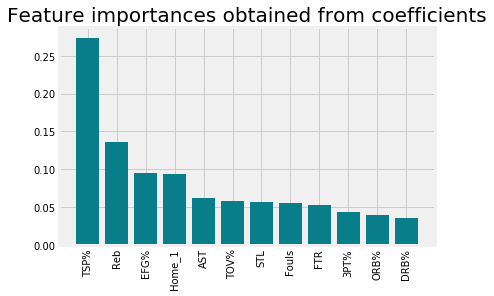

In [83]:
#It looks like True Shooting Percentage is the most valuable for predicting wins and losses
#I will use this variable to rank the ACC teams

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

# Ranking of Teams

In [84]:
#Here I am creating a new dataframe with teams and their average true shooting percentage

rankings = accbball.groupby('Team').agg({'Result_Win': 'sum', 'Team':'count', 'TSP%':'mean'})

In [85]:
#Brief look at new dataframe

rankings.head()

,Result_Win,Team,TSP%
Team,,,
Boston College Eagles,5,19,0.507120
Clemson Tigers,9,19,0.528376
Duke Blue Devils,17,21,0.559900
Florida State Seminoles,15,21,0.541418
Georgia Tech Yellow Jackets,6,19,0.517316


In [86]:
#Here I am sorting the dataframe by wins to get a glance at how it lines up with TSP

rankings = rankings.sort_values(by="Result_Win", ascending=False)

In [87]:
#Looks like it's not a perfect predictor, but does pass the eye test overall

rankings

,Result_Win,Team,TSP%
Team,,,
Duke Blue Devils,17,21,0.559900
North Carolina Tar Heels,17,20,0.557598
Virginia Cavaliers,17,20,0.590692
Florida State Seminoles,15,21,0.541418
Virginia Tech Hokies,13,20,0.585932
Louisville Cardinals,11,20,0.541199
Syracuse Orange,11,20,0.530984
North Carolina State Wolfpack,10,20,0.508150
Clemson Tigers,9,19,0.528376


In [88]:
#Here I am creating a column for win percentage. That will be better to measure than total wins
    
rankings["Win%"] = rankings["Result_Win"]/rankings["Team"]

In [89]:
#Win percentage lines up better with true shooting percentage than total wins

rankings

,Result_Win,Team,TSP%,Win%
Team,,,,
Duke Blue Devils,17,21,0.559900,0.809524
North Carolina Tar Heels,17,20,0.557598,0.850000
Virginia Cavaliers,17,20,0.590692,0.850000
Florida State Seminoles,15,21,0.541418,0.714286
Virginia Tech Hokies,13,20,0.585932,0.650000
Louisville Cardinals,11,20,0.541199,0.550000
Syracuse Orange,11,20,0.530984,0.550000
North Carolina State Wolfpack,10,20,0.508150,0.500000
Clemson Tigers,9,19,0.528376,0.473684


In [90]:
#Dropping "Team" and "Result_Win" since we controlled for those with win percentage

rankings = rankings.drop(['Team', 'Result_Win'], axis = 'columns')

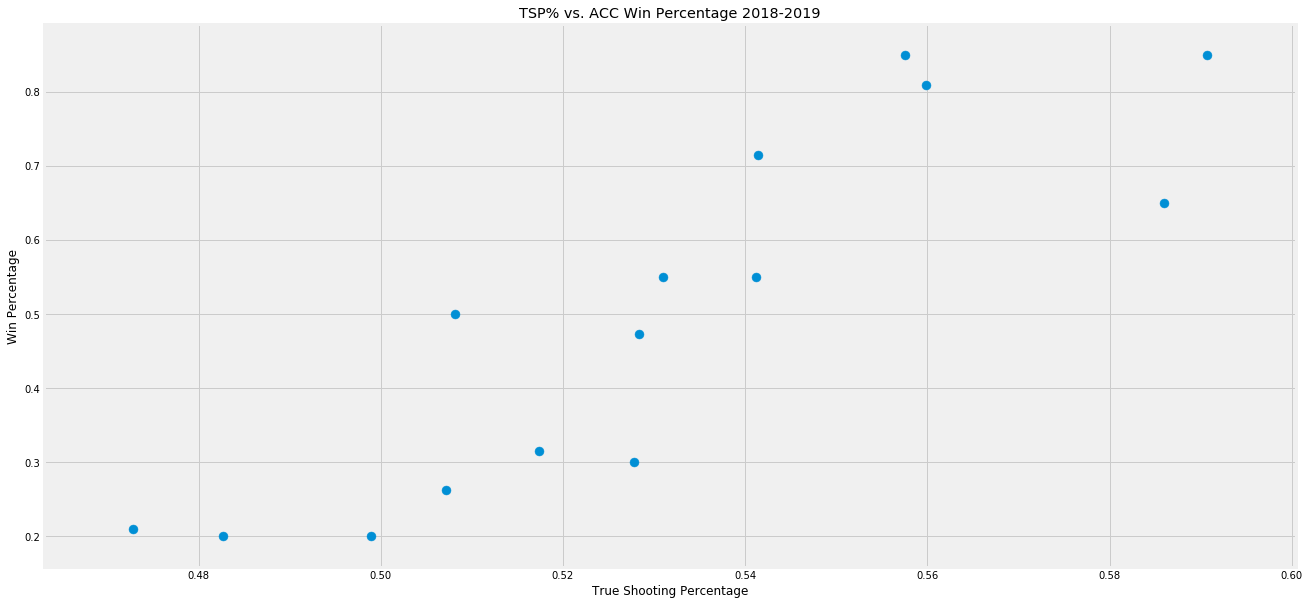

In [91]:
#Here is a scatter plot visualizing the relationship between TSP% and Win%
#Seems to line up pretty well

ax = rankings.plot(kind='scatter', x='TSP%', y='Win%', rot=0, figsize=(20,10), s=80)
plt.ylabel("Win Percentage")
plt.xlabel("True Shooting Percentage")
plt.title("TSP% vs. ACC Win Percentage 2018-2019");

In [92]:
#Here I am creating a ranking based on true shooting percentage

rankings["Rank"] = rankings["TSP%"].rank(ascending=False)

In [93]:
#What the dataset looks like now

rankings.head()

,TSP%,Win%,Rank
Team,,,
Duke Blue Devils,0.559900,0.809524,3.0
North Carolina Tar Heels,0.557598,0.850000,4.0
Virginia Cavaliers,0.590692,0.850000,1.0
Florida State Seminoles,0.541418,0.714286,5.0
Virginia Tech Hokies,0.585932,0.650000,2.0


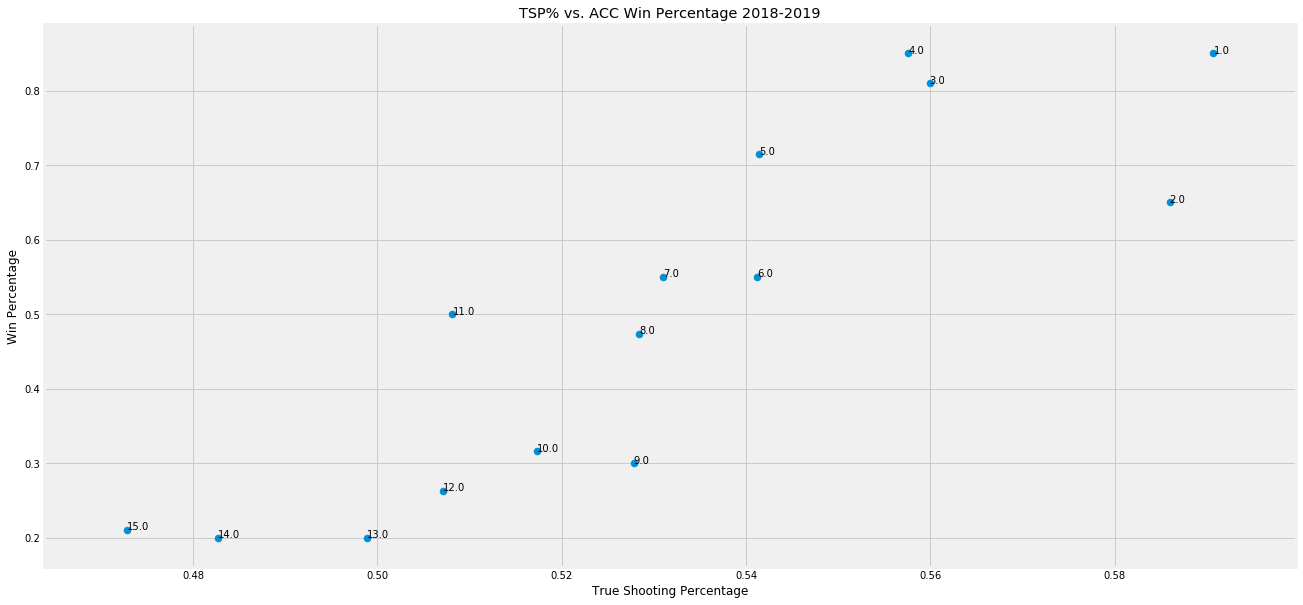

In [94]:
#Here is a scatter plot visualizing the relationship between TSP% and Win%
#I have also added the rank for each team as a data label

ax = rankings.plot(kind='scatter', x='TSP%', y='Win%', rot=0, figsize=(20,10), s=50)
plt.ylabel("Win Percentage")
plt.xlabel("True Shooting Percentage")
plt.title("TSP% vs. ACC Win Percentage 2018-2019");

rankings[['TSP%','Win%','Rank']].apply(lambda row: ax.text(*row),axis=1);

In [95]:
#Simplfying the dataset before I convert it to a CSV file

rankings = rankings[['Rank','TSP%']]

In [96]:
rankings.head()

,Rank,TSP%
Team,,
Duke Blue Devils,3.0,0.559900
North Carolina Tar Heels,4.0,0.557598
Virginia Cavaliers,1.0,0.590692
Florida State Seminoles,5.0,0.541418
Virginia Tech Hokies,2.0,0.585932


In [97]:
#Sorting the dataset by rank

rankings = rankings.sort_values(by="Rank", ascending=True)

In [98]:
#Officially exporting the dataset to a CSV file

rankings.to_csv("ACCRankings1819.csv")

# Sources

1.) https://benchboss.ai/efficiency-the-most-important-stat-in-basketball/
    
2.) https://www.nba.com/stats/teams/advanced/?sort=W&dir=-1

3.) https://www.breakthroughbasketball.com/stats/how-we-use-stats-Hagness.html

4.) https://www.basketball-reference.com/about/factors.html